In [25]:
###### import requests
import json
import time
from datetime import datetime
import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy.random as rng

In [26]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv1D,Conv2D, ZeroPadding2D, Activation, Input, concatenate,MaxPooling1D
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K


In [27]:
def viewAllDataFromFolder(dataPath):
    onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    count = 0
    fileLs = []
    lsBdTrain = None
    dataList = []
    for fs in onlyfiles:
        count = count + 1
        dataItem = pd.read_pickle(dataPath+"/"+fs)
        dataItem["FileIndex"]=count
        dataList.append(dataItem)
    frame = pd.concat(dataList)
    frame = frame.reset_index().fillna(0)
#     frame["node"] = frame["node"].apply(lambda x : 2 if x=="tan-k2" else 3 if x=="tan-k3" else 1 if x=="tan-km" else x)
    return (frame,count)

In [613]:
(dataset,filecount) = viewAllDataFromFolder("data3")

In [36]:
# dataset[dataset["node"] == "tan-k3"].sort_values(by=['timestamp']).set_index(["timestamp"])["cpu_system"].plot()

In [46]:
# dataset[dataset["node"] == "tan-k3"].to_excel("output.xlsx")  

In [38]:
# dataset[dataset["node"] == "tan-k3"]["cpu_system"].sort_values(by=['timestamp']).plot()

In [614]:
dataset = dataset.fillna(0)
dataset["timemm"] = dataset['timestamp']
dataset['timemm'] = dataset['timemm'].apply(lambda x: datetime.fromtimestamp(x))
dataset["year"] = dataset['timemm'].apply(lambda x:x.year)
dataset["month"] = dataset['timemm'].apply(lambda x:x.month)
dataset["day"] = dataset['timemm'].apply(lambda x:x.day)
dataset["hour"] = dataset['timemm'].apply(lambda x:x.hour)
dataset["minute"] = dataset['timemm'].apply(lambda x:x.minute)
dataset["second"] = dataset['timemm'].apply(lambda x:x.second)
del dataset['timemm']

dataset["node"] = dataset["node"].apply(lambda x : 2 if x=="tan-k2" else 3 if x=="tan-k3" else 1 if x=="tan-km" else x)
dataset["cpu_total"] = 1 - dataset["cpu_idle"]

dataset["cpu_user_rate"] = dataset["cpu_user"] / dataset["cpu_total"]
dataset["cpu_system_rate"] = dataset["cpu_system"] / dataset["cpu_total"]

dataset["mem_used"] = dataset["mem_total"]
dataset["mem_total"] = dataset["mem_used"] + dataset["mem_avail"]

# dataset["mem_used_rate"] = dataset["mem_used"] / dataset["mem_total"]
# dataset["mem_avail_rate"] = dataset["mem_avail"] / dataset["mem_total"]



In [49]:
dataset[dataset["node"] == 3].to_excel("output.xlsx")  

<AxesSubplot:xlabel='timestamp'>

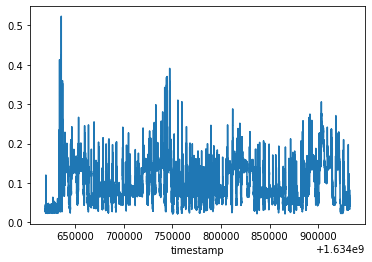

In [360]:
dataset[dataset["node"] == 3].sort_values(by=['timestamp']).set_index(["timestamp"])["cpu_system"].plot()

In [615]:
dataset["label"]=1

In [616]:
maliciousList = pd.read_csv('malicious.csv')

In [617]:
for index, row in maliciousList.iterrows():
    print(row['start'], row['end'])
#     dataset["label"] = (dataset["timestamp"] >= row['start'] and dataset["timestamp"] <= row['end'] )
    dataset.loc[(dataset["timestamp"] >= row['start']) & (dataset["timestamp"] <= row['end']) & (dataset["node"]==3), 'label'] = 0
#     dataset["label"] = dataset["timestamp"].apply(lambda x : 2 if x

1634741403 1634744799
1634746983 1634749479
1634751724 1634753723
1634755523 1634757331
1634759601 1634761924
1634764284 1634765645
1634767997 1634770217
1634772147 1634773974
1634776211 1634777860
1634779991 1634782183
1634784368 1634785804
1634787620 1634789659
1634792005 1634793846
1634796163 1634797717
1634816463 1634819920
1634883825 1634886005
1634891428 1634893554
1634897593 1634899041
1634903016 1634904522
1634908556 1634909825
1634913579 1634915042
1634919030 1634921514
1634925458 1634927224
1634931053 1634932401
1634933977 1634935566
1634939202 1634941499
1634945259 1634946749
1634950602 1634952710
1634956782 1634958086
1634962170 1634964331
1634968407 1634969899
1634974099 1634976212
1634980066 1634981852
1634985483 1634987099
1634991177 1634992891
1634994691 1634995763
1634999610 1635000600
1635004553 1635005442
1635009436 1635010588
1635014614 1635015297
1635020232 1635020421
1635024082 1635024265
1635028461 1635028642
1635032500 1635032853
1635036965 1635037164
1635040790

In [84]:
# numbers = {'set_of_numbers': [1,2,3,4,5,6,7,8,9,10],'ck':'True'}
# df = pd.DataFrame(numbers,columns=['set_of_numbers','ck'])

# # df.loc[df[df['set_of_numbers'] <= 5 and df['set_of_numbers'] >= 2].index(), 'ck'] = 'True' 
# # df.loc[df['set_of_numbers'] > 5, 'ck'] = 'False' 

# # print (df)
# df[(df['set_of_numbers'] <= 5) & (df['set_of_numbers'] >= 2)]

In [586]:
dataset

,timestamp,cpu_system,cpu_idle,cpu_user,cpu_iowait,pod_count,system_load,mem_total,mem_avail,disk_io,...,year,month,day,hour,minute,second,cpu_total,cpu_user_rate,cpu_system_rate,mem_used
0,1.634994e+09,0.106333,0.344000,0.442333,0.078000,8.0,34.76,4.086055e+09,1.728229e+09,0.359467,...,2021,10,23,12,56,0,0.656000,0.674289,0.162093,2.357826e+09
1,1.634994e+09,0.106333,0.344000,0.442333,0.078000,8.0,34.76,4.086055e+09,1.728229e+09,0.359467,...,2021,10,23,12,56,8,0.656000,0.674289,0.162093,2.357826e+09
2,1.634994e+09,0.097333,0.414333,0.458000,0.020333,8.0,28.28,4.086055e+09,1.716957e+09,0.426667,...,2021,10,23,12,56,16,0.585667,0.782015,0.166192,2.369098e+09
3,1.634994e+09,0.097333,0.414333,0.458000,0.020333,8.0,28.28,4.086055e+09,1.716957e+09,0.426667,...,2021,10,23,12,56,24,0.585667,0.782015,0.166192,2.369098e+09
4,1.634994e+09,0.090667,0.400333,0.474000,0.008333,8.0,27.14,4.086055e+09,1.713963e+09,0.342133,...,2021,10,23,12,56,32,0.599667,0.790439,0.151195,2.372092e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198439,1.634785e+09,0.055667,0.427000,0.503667,0.001667,6.0,3.37,4.086055e+09,1.893372e+09,0.010933,...,2021,10,21,3,3,8,0.573000,0.878999,0.097150,2.192683e+09
198440,1.634785e+09,0.058322,0.629874,0.287942,0.006665,6.0,2.76,4.086055e+09,1.892340e+09,0.048257,...,2021,10,21,3,3,16,0.370126,0.777958,0.157572,2.193715e+09
198441,1.634785e+09,0.058322,0.629874,0.287942,0.006665,6.0,2.76,4.086055e+09,1.892340e+09,0.048257,...,2021,10,21,3,3,24,0.370126,0.777958,0.157572,2.193715e+09
198442,1.634785e+09,0.062346,0.474428,0.402414,0.030673,6.0,2.29,4.086055e+09,1.892962e+09,0.137628,...,2021,10,21,3,3,32,0.525572,0.765669,0.118625,2.193093e+09


<AxesSubplot:xlabel='timestamp'>

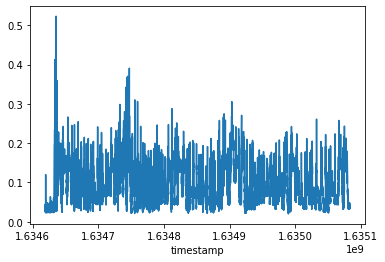

In [550]:
dataset[dataset["node"] == 3].sort_values(by=['timestamp']).set_index(["timestamp"])["cpu_system"].plot()

In [265]:
# cpuSysData

In [618]:
def plotColor(dataset, node, metric,startTime,endTime, ax,locX,locY):
#     node=3
#     metric = "cpu_system"
    refDataset = dataset[(dataset["node"] == node) & (dataset["timestamp"]>=startTime) & (dataset["timestamp"]<=endTime) ].copy()
    refDataset = refDataset.sort_values(by=['timestamp']).set_index(["timestamp"])
    df = refDataset[[metric,"label"]]
    df["label"] = df["label"].apply(lambda x : -1 if x==0 else 1)
    def plot_func(group):
    #     print(group['cpu_system'])
#         global ax
#         global locX
#         global locY
        color = 'r' if (group['label'] < 0).all() else 'g'
        lw = 1.0
        ax[locX,locY].plot(group.index, group[metric], c=color, linewidth=lw)

    df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)
    ax[locX,locY].set_title(metric)

# add ma lines
# ax.plot(df.index, df['cpu_system'], 'k--', label='MA-50')
# ax.plot(df.index, df['200dma'], 'b--', label='MA-200')
# ax.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

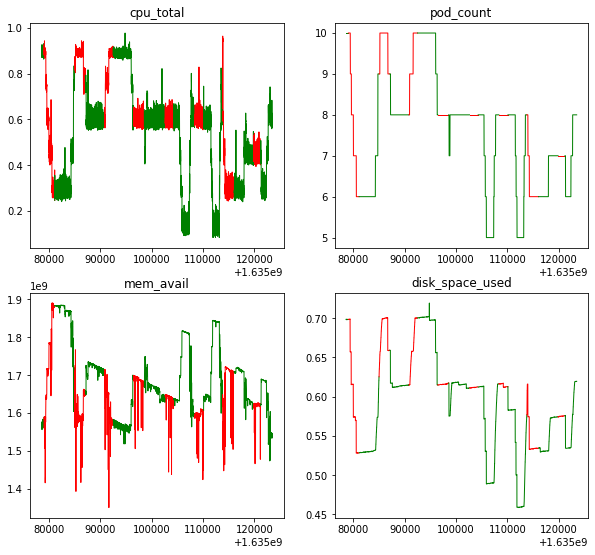

In [678]:
node=3
startTime = 1635078609 #Sunday, 24 October 2021 14:30:09 GMT+02:00 DST
endTime = 1635123514

# endTime = 1635168420 #Monday, 25 October 2021 15:27:00 GMT+02:00 DST #Last
metricLs = ["cpu_total","pod_count","mem_avail","disk_space_used"]
divident = 2
xlen = len(metricLs)

xc = xlen % divident
if xc > 0 :
    xc = int(xlen / divident) + 1
else :
    xc = int(xlen / divident)
yc = divident
    
fig, axs = plt.subplots(xc, yc)
plt.subplots_adjust(top=1.5,wspace=0.2,hspace=0.2)
fig.set_size_inches(10, 5, forward=True)

for i in range(0,xlen):
    locX = int(i/divident)
    locY = i%divident
    plotColor(dataset, node, metricLs[i],startTime,endTime, axs, locX,locY)
# plotColor(dataset, node, "cpu_total",startTime,endTime, axs, 0,1)

In [167]:
# dataset[(dataset["node"] == 3) & (dataset["timestamp"]>=1634746983) & (dataset["timestamp"]<=1634749479) ].to_excel("output.xlsx")

In [172]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # simulate data
# # =============================
# np.random.seed(1234)
# df = pd.DataFrame({'px_last': 100 + np.random.randn(1000).cumsum()}, index=pd.date_range('2010-01-01', periods=1000, freq='B'))


# df['50dma'] = df['px_last'].rolling(50).mean()
# df['200dma'] = df['px_last'].rolling(200).mean()

# df['label'] = np.where(df['50dma'] > df['200dma'], 1, -1)


# # plot
# # =============================
# df = df.dropna(axis=0, how='any')

# fig, ax = plt.subplots()

# def plot_func(group):
#     global ax
#     color = 'r' if (group['label'] < 0).all() else 'g'
#     lw = 2.0
#     ax.plot(group.index, group.px_last, c=color, linewidth=lw)

# df.groupby((df['label'].shift() * df['label'] < 0).cumsum()).apply(plot_func)

# # add ma lines
# # ax.plot(df.index, df['50dma'], 'k--', label='MA-50')
# # ax.plot(df.index, df['200dma'], 'b--', label='MA-200')
# # ax.legend(loc='best')

In [620]:
dataTest = dataset[(dataset["node"] == 3) ].sort_values(by=['timestamp'])
difference = dataTest["timestamp"].diff(periods=-1)
difference.value_counts()

-8.0    68669
-4.0        7
 0.0        7
Name: timestamp, dtype: int64

In [590]:
dataTest["label"].value_counts()

1    53943
0    12205
Name: label, dtype: int64

<AxesSubplot:>

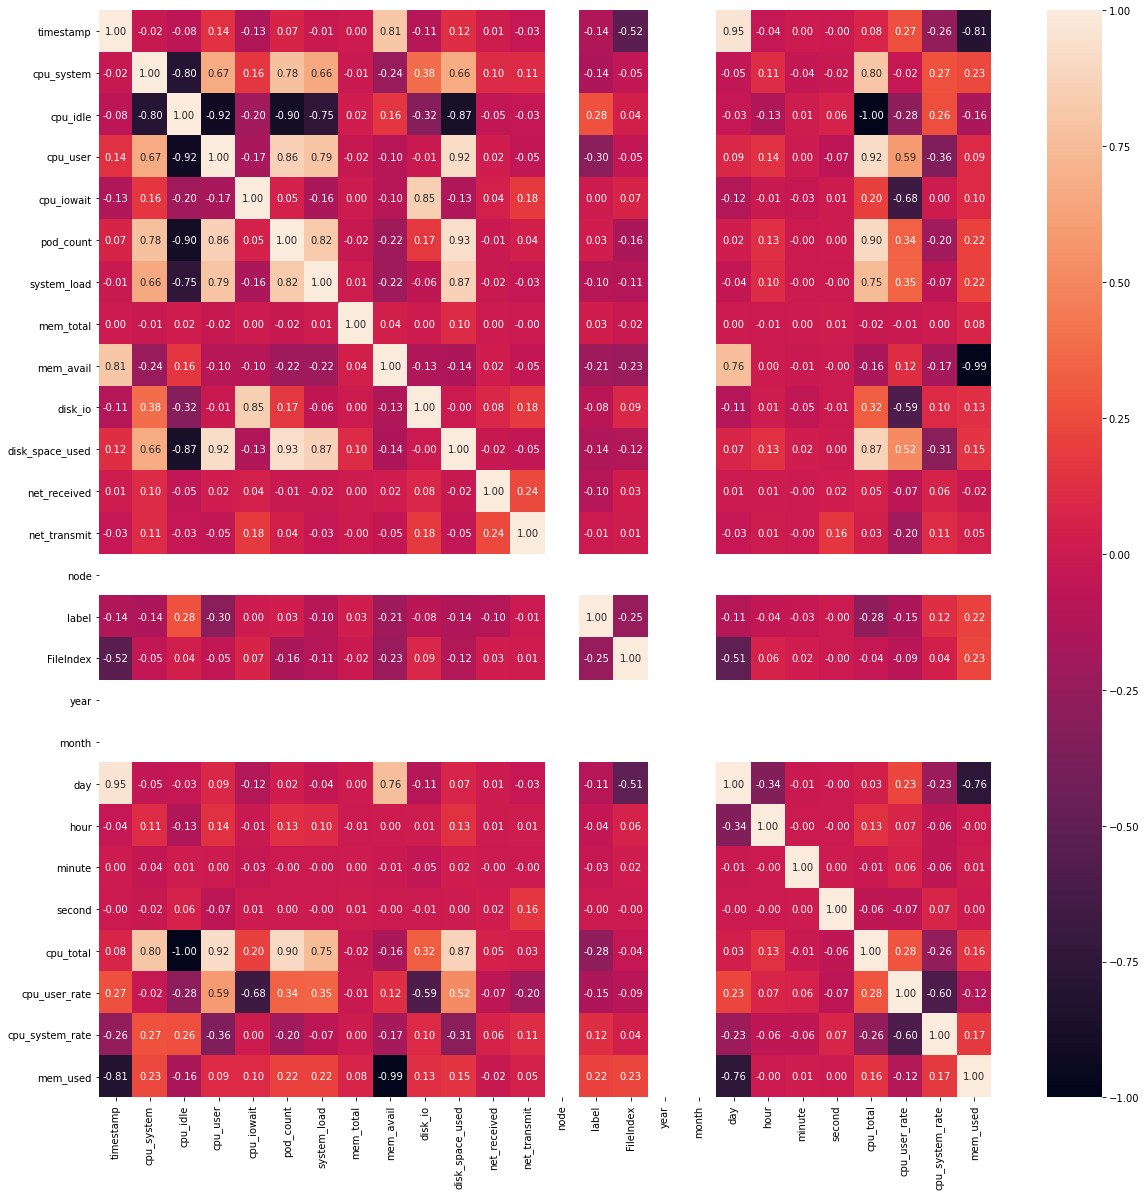

In [270]:
import seaborn as sn
plt.figure(figsize=(20,20))
sn.heatmap(dataTest.corr(), annot=True, fmt='.2f')

In [635]:
node=3
startTime = 1635078609
endTime = 1635168420
dataTest = dataset[(dataset["node"] == node) & (dataset["timestamp"]>=startTime) & (dataset["timestamp"]<=endTime) ].sort_values(by=['timestamp']).copy()
dataTest.to_pickle("data3/datanote3.pkl")

In [661]:
node=3
startTime = 1635078609
endTime = 1635168420
dataTest = dataset[(dataset["node"] == node) & (dataset["timestamp"]>=startTime) & (dataset["timestamp"]<=endTime) ].sort_values(by=['timestamp']).copy()

# difference = dataTest["timestamp"].diff(periods=-1)
# difference.value_counts()

dataToRun = dataTest[['cpu_system','cpu_idle','cpu_user','cpu_iowait','pod_count','system_load','mem_avail','disk_io','disk_space_used','net_received','net_transmit','year','month','day','hour','minute','second','cpu_total','cpu_user_rate','cpu_system_rate','mem_used','label']].copy()
dataToRun["label"].value_counts()

1    7559
0    3670
Name: label, dtype: int64

In [663]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost

In [664]:
def resampleData(dataset,label):
    dataX = dataset.drop(label, axis=1)
    dataY = dataset[label]
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(dataX, dataY)
    result = pd.concat([X_res, y_res], axis=1)
    return result

def normalizeColumn(datas):
    datas2 = datas.copy()
    cols = datas2.columns
    for e in range(0,14):
        print(e," ",cols[e])
        normalized_df=(datas2[cols[e]]-datas2[cols[e]].mean())/datas2[cols[e]].std()
        datas2[cols[e]] = normalized_df
    return datas2

In [665]:
rsDataset = resampleData(dataToRun, "label")

In [666]:
def splitDataSetSKLearn(datasetnorms, testSplitPercent):
    dataAllX = datasetnorms.drop("label", axis=1)
    dataAllY = datasetnorms["label"]
    X_train, X_test, y_train, y_test = train_test_split(dataAllX, dataAllY, test_size=testSplitPercent)
    print("splitDataSet with sklearn")
    print("Train")
    print(X_train.shape)
    print("Train labels")
    print(y_train.value_counts())
    print("Test")
    print(X_test.shape)
    print("Test labels")
    print(y_test.value_counts())
    print("All")
    print(dataAllX.shape)
    return (dataAllX,dataAllY,X_train,y_train,X_test,y_test)
# splitDataSetSKLearn(nDatasetNormKnn,70)

In [667]:
(dataTrainM, dataTestM, dataTrainMX, dataTrainMY, dataTestMX, dataTestMY) = splitDataSetSKLearn(rsDataset, 0.3)

splitDataSet with sklearn
Train
(10582, 21)
Train labels
0    5307
1    5275
Name: label, dtype: int64
Test
(4536, 21)
Test labels
1    2284
0    2252
Name: label, dtype: int64
All
(15118, 21)


In [349]:
# dataTrainMX

In [340]:
# dataTestMX

In [668]:
modelXGboost = xgboost.XGBRFClassifier(n_estimators=100,objective='binary:logistic')
modelXGboost.fit(dataTrainMX.to_numpy(), dataTrainMY.to_numpy())

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:31] WARNING: /tmp/pip-build-5iihhz2k/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=6, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [669]:
y_pred = modelXGboost.predict(dataTestMX.to_numpy())
print("Accuracy score:",accuracy_score(dataTestMY, y_pred))

Accuracy score: 0.76168430335097


In [670]:
featureList = list(dataTrainMX.columns.values)
featureList

['cpu_system',
 'cpu_idle',
 'cpu_user',
 'cpu_iowait',
 'pod_count',
 'system_load',
 'mem_avail',
 'disk_io',
 'disk_space_used',
 'net_received',
 'net_transmit',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'cpu_total',
 'cpu_user_rate',
 'cpu_system_rate',
 'mem_used']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

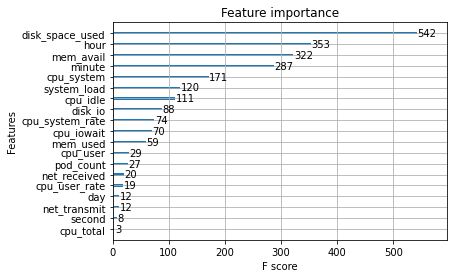

In [671]:
modelXGboost.get_booster().feature_names = featureList
xgboost.plot_importance(modelXGboost.get_booster())

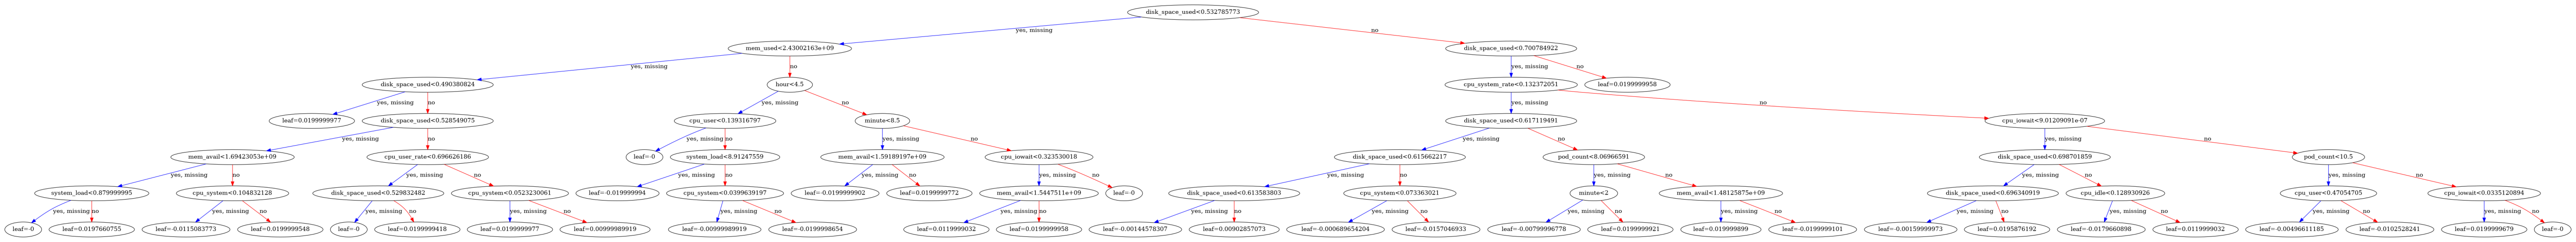

In [672]:
fig, ax = plt.subplots(figsize=(100, 100))
xgboost.plot_tree(modelXGboost, num_trees=10, ax=ax)
plt.show()

In [673]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [674]:
dataAllX = rsDataset.drop("label", axis=1)
dataAllY = rsDataset["label"]

In [675]:
modelXGboost = xgboost.XGBRFClassifier(n_estimators=100,objective='binary:logistic')

In [676]:
# start_time = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(modelXGboost, dataAllX, dataAllY, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
# force scores to be positive

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min finished


In [677]:
scores = absolute(scores)
print('Mean score: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean score: 0.778 (0.015)
